# Sanity test for SEIR model

In [1]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

In [2]:
from graphs.plot_graphs import plot_infectous_pop
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go

## SEIR sanity test model
### LMFIT (A python tool for model fitting)

In [3]:
%%capture
import sys
!{sys.executable} -m pip install lmfit

In [4]:
%%capture
!{sys.executable} -m pip install matplotlib

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, report_fit
from scipy.integrate import odeint
from model_seir.params import create_params
from model_seir.run_model import run_model
from model_seir.residual import get_residual
from model_seir.derivative import deriv

In [6]:
incubation_time = 5.0      # Incubation period of five days (1 to 12 days, but 5 days on average)
infective_time = 3.0         # Infectious period may start 1 to 3 days before you develop symptoms
gamma = 1 / infective_time        # Recovery rate
delta = 1 / incubation_time       # Incubation period
R0 = 4                            # Basic reproductive number
beta = R0 * gamma                 # Infection rate: R_0 = beta / gamma, so beta = R_0 * gamma
N = 1

# initial conditions
E0 = 1/20000
I0 = 0.00
R0 = 0.00
S0 = N - E0 - I0 - R0

In [7]:
# tuple -> (<value>, <vary>)
params = create_params(
    (S0, False), (E0, False), (I0, False), (R0, False), (N, False), 
    (beta, True), (gamma, False), (delta, False)
    )

In [8]:
days = 160
x = np.linspace(0, days, days)
dS, dE, dI, dR = run_model(params, x)

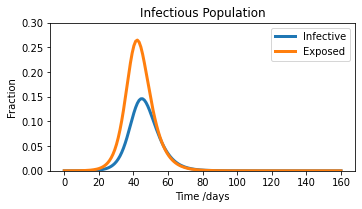

In [9]:
plot_infectous_pop(x, dE, dI)

Only beta varying. Inital value equal to 1.

In the end of the model execution, beta must be equal to 4/3 (1.333...)

In [10]:
params['beta'].value = 1

data = dI
params.pretty_print()

Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
E0        5e-05     -inf      inf     None    False     None     None
I0            0     -inf      inf     None    False     None     None
N             1     -inf      inf     None    False     None     None
R0            0     -inf      inf     None    False     None     None
S0            1     -inf      inf     None    False     None     None
beta          1     -inf      inf     None     True     None     None
delta       0.2     -inf      inf     None    False     None     None
gamma    0.3333     -inf      inf     None    False     None     None


In [11]:
out = minimize(get_residual, params, args=(data, x))

In [12]:
out.params

name,value,standard error,relative error,initial value,min,max,vary
S0,0.99995000,0.00000000,(0.00%),0.99995,-inf,inf,False
E0,5.0000e-05,0.00000000,(0.00%),5e-05,-inf,inf,False
I0,0.00000000,0.00000000,,0.0,-inf,inf,False
R0,0.00000000,0.00000000,,0.0,-inf,inf,False
N,1.00000000,0.00000000,(0.00%),1,-inf,inf,False
beta,1.33333333,8.7632e-17,(0.00%),1,-inf,inf,True
gamma,0.33333333,0.00000000,(0.00%),0.3333333333333333,-inf,inf,False
delta,0.20000000,0.00000000,(0.00%),0.2,-inf,inf,False


In [13]:
report_fit(out)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 160
    # variables        = 1
    chi-square         = 2.2519e-30
    reduced chi-square = 1.4163e-32
    Akaike info crit   = -11732.5504
    Bayesian info crit = -11729.4752
[[Variables]]
    S0:     0.99995 (fixed)
    E0:     5e-05 (fixed)
    I0:     0 (fixed)
    R0:     0 (fixed)
    N:      1 (fixed)
    beta:   1.33333333 +/- 8.7632e-17 (0.00%) (init = 1)
    gamma:  0.3333333 (fixed)
    delta:  0.2 (fixed)


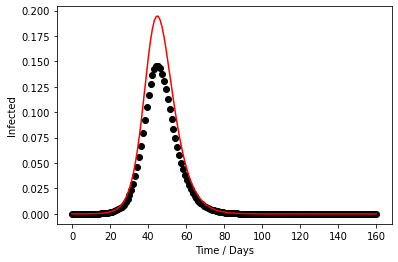

In [14]:
plt.scatter(x,data,c='black')
plt.xlabel('Time / Days')
plt.ylabel('Infected')
plt.plot(x, data*beta, c='red', ls='-')
plt.show()